# Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import copy
sns.set()
%matplotlib inline

In [18]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


# Drop irrelevant columns to tidy up the dataframe


In [19]:
#drop 
df.drop(['start_station_id', 'start_station_name', 'end_station_id'
              , 'end_station_name', 'end_time', 'start_station_latitude',
              'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id',
              'bike_share_for_all_trip'], axis=1, inplace=True)


In [20]:
df.head(5)

,duration_sec,start_time,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,Subscriber,1974.0,Male


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration_sec       183412 non-null  int64  
 1   start_time         183412 non-null  object 
 2   user_type          183412 non-null  object 
 3   member_birth_year  175147 non-null  float64
 4   member_gender      175147 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


In [22]:
#check for null vaues
df.isna().apply(pd.value_counts)

,duration_sec,start_time,user_type,member_birth_year,member_gender
False,183412.0,183412.0,183412.0,175147,175147
True,NaN,NaN,NaN,8265,8265


In [23]:
# fill up missing values in member_birth_year with the mean
mean_value = df['member_birth_year'].mean()
print(mean_value)

df['member_birth_year'].fillna(mean_value, inplace=True)

1984.8064368787361


In [24]:
bins= [1878,1922,1972,1986,2001,2022]
labels = ['very_young','young','midlife','old','very_old']
df['AgeGroup'] = pd.cut(df['member_birth_year'], bins=bins, labels=labels, right=False)
display (df.head())

,duration_sec,start_time,user_type,member_birth_year,member_gender,AgeGroup
0,52185,2019-02-28 17:32:10.1450,Customer,1984.000000,Male,midlife
1,42521,2019-02-28 18:53:21.7890,Customer,1984.806437,NaN,midlife
2,61854,2019-02-28 12:13:13.2180,Customer,1972.000000,Male,midlife
3,36490,2019-02-28 17:54:26.0100,Subscriber,1989.000000,Other,old
4,1585,2019-02-28 23:54:18.5490,Subscriber,1974.000000,Male,midlife


In [25]:
df["duration_h"] = df['duration_sec']/360


In [26]:
df['AgeGroup'].value_counts()

old           100548
midlife        63046
young          19709
very_young        75
very_old          34
Name: AgeGroup, dtype: int64

In [27]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
member_birth_year,183412.0,1984.806437,9.886118,1878.000000,1981.000000,1987.000000,1992.000000,2001.000000
duration_h,183412.0,2.016885,4.984416,0.169444,0.902778,1.427778,2.211111,237.344444


<AxesSubplot:xlabel='member_birth_year'>

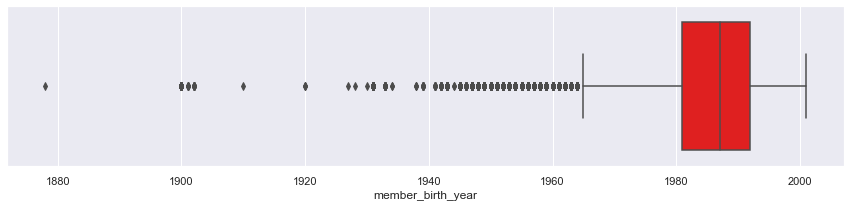

In [29]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.boxplot(x = df.member_birth_year, color ="red" )


(array([1.0000e+00, 7.0000e+01, 1.0000e+00, 4.0000e+00, 1.2700e+02,
        8.2900e+02, 8.0460e+03, 2.2273e+04, 7.7706e+04, 7.4355e+04]),
 array([1878. , 1890.3, 1902.6, 1914.9, 1927.2, 1939.5, 1951.8, 1964.1,
        1976.4, 1988.7, 2001. ]),
 <BarContainer object of 10 artists>)

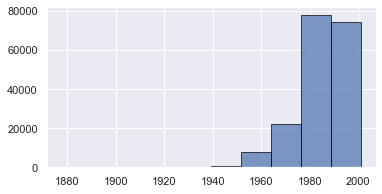

In [30]:
# Plots to see the distribution of the continuous features individually
plt.figure(figsize =(20,10))

plt.subplot(3,3,1)
plt.hist(df.member_birth_year , edgecolor = 'black', alpha = 0.7)



In [31]:
df['start_time'].max()

'2019-02-28 23:59:18.5480'

In [32]:
df.groupby('user_type').mean()

,duration_sec,member_birth_year,duration_h
user_type,,,
Customer,1432.465019,1985.270708,3.979069
Subscriber,640.263678,1984.750035,1.778510


<AxesSubplot:xlabel='AgeGroup', ylabel='duration_h'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


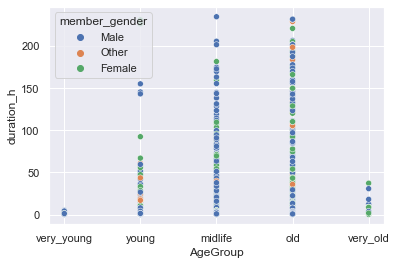

In [33]:
sns.scatterplot(data=df, x="AgeGroup", y="duration_h", hue="member_gender")

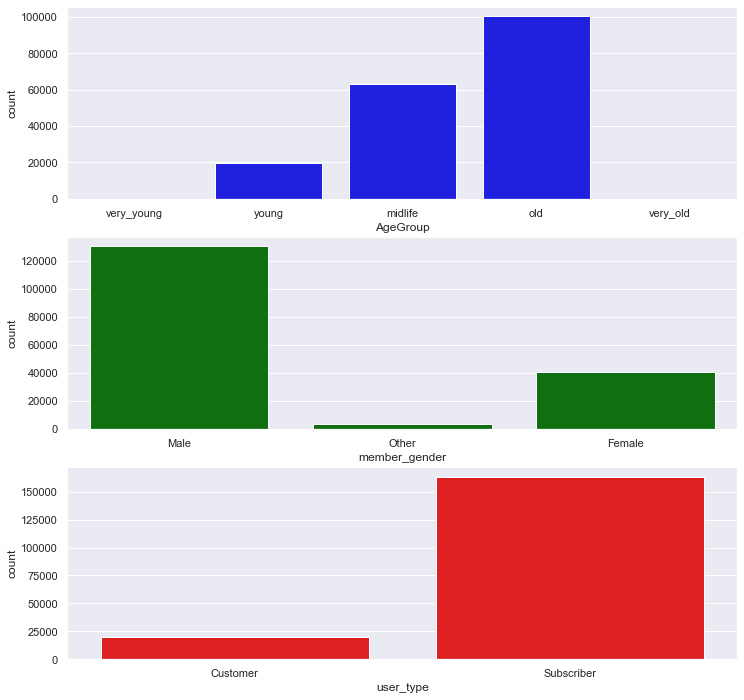

In [36]:
# let's plot the categorical columns together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

sns.countplot(data = df, x = 'AgeGroup', color = "blue", ax = ax[0])
sns.countplot(data = df, x = 'member_gender', color = 'green', ax = ax[1])
sns.countplot(data = df, x = 'user_type', color = 'red', ax = ax[2])

plt.show()

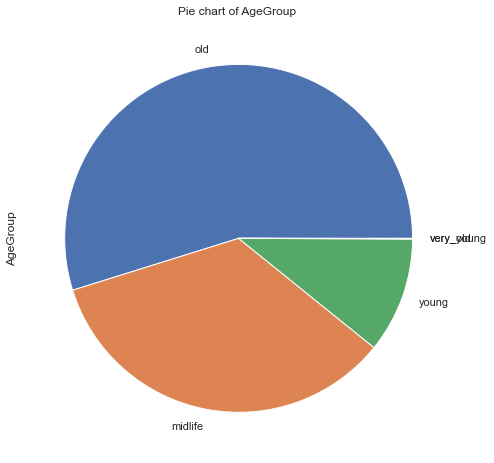

In [37]:
df['AgeGroup'].value_counts().plot(kind='pie', title='Pie chart of AgeGroup ', figsize= (8,8));

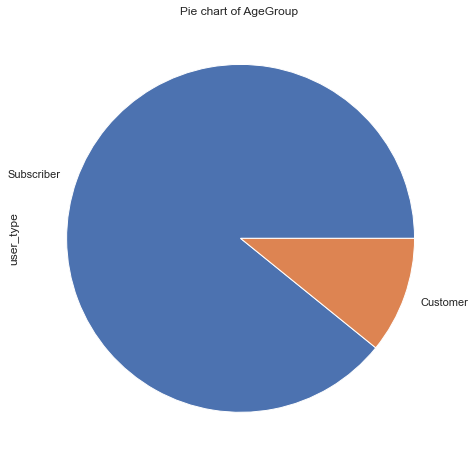

In [38]:
df['user_type'].value_counts().plot(kind='pie', title='Pie chart of AgeGroup ', figsize= (8,8));

# summary
1-